<a href="https://colab.research.google.com/github/Sheljalomash140897/Python-Visualization/blob/main/spotify_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Connect Google Drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly 
import plotly.express as px
% matplotlib inline


In [ ]:
#getting data from google drive
path="/gdrive/MyDrive/spotify_tracks_metadata.csv.zip"
df=pd.read_csv(path)


In [ ]:
#working on data
df.describe()


,Unnamed: 0,song_popularity,album_release_year,album_release_month,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,total_available_markets,valence
count,439893.00000,439893.000000,439690.000000,420559.000000,439893.000000,439893.000000,4.398930e+05,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000,439893.000000
mean,219946.00000,22.809390,2014.952946,6.155396,0.332647,0.616870,2.133885e+05,0.584848,0.188697,5.288957,0.209445,-9.960702,0.574342,0.191600,119.238750,3.878545,160.520076,0.475361
std,126986.31532,18.518437,17.427527,3.711844,0.320389,0.178007,1.239932e+05,0.249089,0.338787,3.606797,0.179297,5.897513,0.494443,0.252524,30.200554,0.546340,33.688941,0.253360
min,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.864000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109973.00000,7.000000,2014.000000,3.000000,0.039700,0.515000,1.540000e+05,0.412000,0.000000,2.000000,0.098900,-12.383000,0.000000,0.042000,95.146000,4.000000,169.000000,0.275000
50%,219946.00000,20.000000,2018.000000,6.000000,0.224000,0.647000,1.993850e+05,0.610000,0.000021,5.000000,0.131000,-8.409000,1.000000,0.071600,120.006000,4.000000,170.000000,0.472000
75%,329919.00000,36.000000,2020.000000,10.000000,0.587000,0.743000,2.473200e+05,0.786000,0.148000,8.000000,0.272000,-5.949000,1.000000,0.232000,139.009000,4.000000,170.000000,0.673000
max,439892.00000,100.000000,2021.000000,12.000000,0.996000,0.994000,6.024647e+06,1.000000,1.000000,11.000000,1.000000,5.285000,1.000000,0.972000,249.810000,5.000000,170.000000,1.000000


In [ ]:
df.head()


,Unnamed: 0,spotify_id,song_name,artist_name,song_popularity,album_release_date,album_release_year,album_release_month,analysis_url,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,song_explicit,speechiness,tempo,time_signature,total_available_markets,track_href,uri,valence
0,0,7lPN2DXiMsVn7XUKtOW1CS,drivers license,Olivia Rodrigo,100,2021-01-08,2021.0,1.0,https://api.spotify.com/v1/audio-analysis/7lPN...,0.72100,0.585,242014.0,0.436,0.000013,10.0,0.1050,-8.761,1.0,True,0.0601,143.874,4.0,170,https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,0.132
1,1,5QO79kh1waicV47BqGRL3g,Save Your Tears,The Weeknd,96,2020-03-20,2020.0,3.0,https://api.spotify.com/v1/audio-analysis/5QO7...,0.02120,0.680,215627.0,0.826,0.000012,0.0,0.5430,-5.487,1.0,True,0.0309,118.051,4.0,170,https://api.spotify.com/v1/tracks/5QO79kh1waic...,spotify:track:5QO79kh1waicV47BqGRL3g,0.644
2,2,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,96,2020-03-20,2020.0,3.0,https://api.spotify.com/v1/audio-analysis/0VjI...,0.00146,0.514,200040.0,0.730,0.000095,1.0,0.0897,-5.934,1.0,False,0.0598,171.005,4.0,170,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.334
3,3,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),24kGoldn,95,2020-07-24,2020.0,7.0,https://api.spotify.com/v1/audio-analysis/3tjF...,0.22100,0.700,140526.0,0.722,0.000000,7.0,0.2720,-3.558,0.0,True,0.0369,90.989,4.0,170,https://api.spotify.com/v1/tracks/3tjFYV6RSFtu...,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,0.756
4,4,27OeeYzk6klgBh83TSvGMA,WITHOUT YOU,The Kid LAROI,94,2020-11-06,2020.0,11.0,https://api.spotify.com/v1/audio-analysis/27Oe...,0.21300,0.662,161385.0,0.413,0.000000,0.0,0.1340,-7.357,1.0,True,0.0299,93.005,4.0,170,https://api.spotify.com/v1/tracks/27OeeYzk6klg...,spotify:track:27OeeYzk6klgBh83TSvGMA,0.467


In [ ]:
df.tail()


,Unnamed: 0,spotify_id,song_name,artist_name,song_popularity,album_release_date,album_release_year,album_release_month,analysis_url,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,song_explicit,speechiness,tempo,time_signature,total_available_markets,track_href,uri,valence
439888,439888,4JC8B6ysYqjYHYgWS2LXD1,Aarti Durga Maa Ki,Anuradha Paudwal,0,2021-03-01,2021.0,3.0,https://api.spotify.com/v1/audio-analysis/4JC8...,0.4150,0.587,317759.0,0.587,0.000000,11.0,0.6000,-8.828,1.0,False,0.0325,89.976,4.0,169,https://api.spotify.com/v1/tracks/4JC8B6ysYqjY...,spotify:track:4JC8B6ysYqjYHYgWS2LXD1,0.564
439889,439889,4MXJGhB29ow0ioRyVtdAO4,Aaramangal,K. S. Chithra,0,2021-02-25,2021.0,2.0,https://api.spotify.com/v1/audio-analysis/4MXJ...,0.5210,0.748,312375.0,0.482,0.000006,9.0,0.2380,-8.669,0.0,False,0.0303,113.019,4.0,169,https://api.spotify.com/v1/tracks/4MXJGhB29ow0...,spotify:track:4MXJGhB29ow0ioRyVtdAO4,0.910
439890,439890,58Su3ZNDTIzK2whzWK9wla,"Aarti (Lovthavti Vikrala) [From ""Shankara Karu...",Anuradha Paudwal,0,2021-03-09,2021.0,3.0,https://api.spotify.com/v1/audio-analysis/58Su...,0.6080,0.672,126457.0,0.380,0.000000,5.0,0.0799,-10.281,0.0,False,0.0349,100.613,3.0,170,https://api.spotify.com/v1/tracks/58Su3ZNDTIzK...,spotify:track:58Su3ZNDTIzK2whzWK9wla,0.908
439891,439891,28QFQkEDBCLczY6CXoxmXb,Aa Bhi Jao Ki,Kavita Krishnamurthy,0,2021-03-04,2021.0,3.0,https://api.spotify.com/v1/audio-analysis/28QF...,0.0891,0.777,337536.0,0.556,0.000891,4.0,0.0896,-10.777,1.0,False,0.0263,106.999,4.0,170,https://api.spotify.com/v1/tracks/28QFQkEDBCLc...,spotify:track:28QFQkEDBCLczY6CXoxmXb,0.784
439892,439892,3lGPQlCipYRcjImggeRRjE,Hablando Pxvadas,D-Optus,0,2020-09-07,2020.0,9.0,https://api.spotify.com/v1/audio-analysis/3lGP...,0.0610,0.812,152560.0,0.465,0.029100,0.0,0.4260,-14.349,0.0,False,0.2150,143.011,4.0,170,https://api.spotify.com/v1/tracks/3lGPQlCipYRc...,spotify:track:3lGPQlCipYRcjImggeRRjE,0.791


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439893 entries, 0 to 439892
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               439893 non-null  int64  
 1   spotify_id               439893 non-null  object 
 2   song_name                439891 non-null  object 
 3   artist_name              439884 non-null  object 
 4   song_popularity          439893 non-null  int64  
 5   album_release_date       439893 non-null  object 
 6   album_release_year       439690 non-null  float64
 7   album_release_month      420559 non-null  float64
 8   analysis_url             439893 non-null  object 
 9   acousticness             439893 non-null  float64
 10  danceability             439893 non-null  float64
 11  duration_ms              439893 non-null  float64
 12  energy                   439893 non-null  float64
 13  instrumentalness         439893 non-null  float64
 14  key 

In [ ]:
#2data_cleaning




In [ ]:
#to check whether data has null values or not
pd.isnull(df).sum()



Unnamed: 0                 0
spotify_id                 0
song_name                  0
artist_name                0
song_popularity            0
album_release_date         0
album_release_year         0
album_release_month        0
analysis_url               0
acousticness               0
danceability               0
duration_ms                0
energy                     0
instrumentalness           0
key                        0
liveness                   0
loudness                   0
mode                       0
song_explicit              0
speechiness                0
tempo                      0
time_signature             0
total_available_markets    0
track_href                 0
uri                        0
valence                    0
dtype: int64

In [ ]:
df=df.fillna('')
df=df.replace(' ', '')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119058 entries, 2019-06-26 to 2020-09-07
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               119058 non-null  int64  
 1   spotify_id               119058 non-null  object 
 2   song_name                119058 non-null  object 
 3   artist_name              119058 non-null  object 
 4   song_popularity          119058 non-null  int64  
 5   album_release_year       119058 non-null  float64
 6   album_release_month      119058 non-null  float64
 7   analysis_url             119058 non-null  object 
 8   acousticness             119058 non-null  float64
 9   danceability             119058 non-null  float64
 10  energy                   119058 non-null  float64
 11  instrumentalness         119058 non-null  float64
 12  key                      119058 non-null  float64
 13  liveness                 119058 non-null  float64
 

In [ ]:
#making album_release_date as index of dataset
df['Release Year'] = pd.DatetimeIndex(df['album_release_year']).year


#getting top 10 popular songs
top_popular=df.sort_values('song_popularity',ascending= True).tail(10)
top_popular

,Unnamed: 0,spotify_id,song_name,artist_name,song_popularity,album_release_year,album_release_month,analysis_url,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,song_explicit,speechiness,tempo,time_signature,total_available_markets,track_href,uri,valence,duration,Release Year
album_release_date,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-06,751,4JE6agBLHGA5TaF6FlqfBD,As the World Caves In,Matt Maltese,79,2017.0,3.0,https://api.spotify.com/v1/audio-analysis/4JE6...,0.3650,0.331,0.450,0.004640,10.0,0.2200,-5.362,1.0,False,0.0340,123.829,4.0,170,https://api.spotify.com/v1/tracks/4JE6agBLHGA5...,spotify:track:4JE6agBLHGA5TaF6FlqfBD,0.180,219,1970
2019-12-13,749,4jAIqgrPjKLTY9Gbez25Qb,Lights Up,Harry Styles,79,2019.0,12.0,https://api.spotify.com/v1/audio-analysis/4jAI...,0.0392,0.575,0.621,0.004500,10.0,0.1410,-8.165,0.0,False,0.0320,101.987,4.0,170,https://api.spotify.com/v1/tracks/4jAIqgrPjKLT...,spotify:track:4jAIqgrPjKLTY9Gbez25Qb,0.270,172,1970
2017-04-27,742,152lZdxL1OR0ZMW6KquMif,Location,Khalid,79,2017.0,4.0,https://api.spotify.com/v1/audio-analysis/152l...,0.3300,0.736,0.449,0.000162,1.0,0.0898,-11.462,0.0,False,0.4250,80.126,4.0,170,https://api.spotify.com/v1/tracks/152lZdxL1OR0...,spotify:track:152lZdxL1OR0ZMW6KquMif,0.326,219,1970
2019-03-29,741,3XF5xLJHOQQRbWya6hBp7d,you should see me in a crown,Billie Eilish,79,2019.0,3.0,https://api.spotify.com/v1/audio-analysis/3XF5...,0.4620,0.678,0.533,0.219000,4.0,0.1390,-10.485,1.0,False,0.1860,150.455,4.0,170,https://api.spotify.com/v1/tracks/3XF5xLJHOQQR...,spotify:track:3XF5xLJHOQQRbWya6hBp7d,0.323,181,1970
2020-11-20,740,54DmTIv86D3sYdiawjULQ0,Dis-ease,BTS,79,2020.0,11.0,https://api.spotify.com/v1/audio-analysis/54Dm...,0.0132,0.731,0.845,0.000000,8.0,0.0782,-5.352,1.0,False,0.1320,101.085,4.0,168,https://api.spotify.com/v1/tracks/54DmTIv86D3s...,spotify:track:54DmTIv86D3sYdiawjULQ0,0.484,240,1970
2020-02-04,739,0TrPqhAMoaKUFLR7iYDokf,Know Your Worth,Khalid,79,2020.0,2.0,https://api.spotify.com/v1/audio-analysis/0TrP...,0.1450,0.790,0.694,0.002520,9.0,0.2810,-7.726,0.0,False,0.0708,103.007,4.0,170,https://api.spotify.com/v1/tracks/0TrPqhAMoaKU...,spotify:track:0TrPqhAMoaKUFLR7iYDokf,0.508,181,1970
2021-01-13,737,7jL2tCE0Xn2tunqWayBkte,Calla Tú,Danna Paola,79,2021.0,1.0,https://api.spotify.com/v1/audio-analysis/7jL2...,0.0436,0.784,0.630,0.007410,6.0,0.1410,-4.005,0.0,False,0.0322,100.003,4.0,170,https://api.spotify.com/v1/tracks/7jL2tCE0Xn2t...,spotify:track:7jL2tCE0Xn2tunqWayBkte,0.281,162,1970
2018-12-14,736,698ItKASDavgwZ3WjaWjtz,Faded,Alan Walker,79,2018.0,12.0,https://api.spotify.com/v1/audio-analysis/698I...,0.0281,0.468,0.627,0.000008,6.0,0.1100,-5.085,1.0,False,0.0476,179.642,4.0,170,https://api.spotify.com/v1/tracks/698ItKASDavg...,spotify:track:698ItKASDavgwZ3WjaWjtz,0.159,212,1970
2021-02-26,769,0siYMEsGrzzzlWLXK5zJfS,BED,Joel Corry,79,2021.0,2.0,https://api.spotify.com/v1/audio-analysis/0siY...,0.0142,0.671,0.782,0.002210,6.0,0.3330,-4.593,1.0,False,0.0341,123.989,4.0,168,https://api.spotify.com/v1/tracks/0siYMEsGrzzz...,spotify:track:0siYMEsGrzzzlWLXK5zJfS,0.618,178,1970


In [ ]:
#getting 10 least popular songs
least_popular=df.sort_values('song_popularity',ascending= True).head(10)
least_popular

,Unnamed: 0,spotify_id,song_name,artist_name,song_popularity,album_release_date,album_release_year,album_release_month,analysis_url,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,song_explicit,speechiness,tempo,time_signature,total_available_markets,track_href,uri,valence
439892,439892,3lGPQlCipYRcjImggeRRjE,Hablando Pxvadas,D-Optus,0,2020-09-07,2020.0,9.0,https://api.spotify.com/v1/audio-analysis/3lGP...,0.0610,0.812,152560.0,0.4650,0.0291,0.0,0.4260,-14.349,0.0,False,0.2150,143.011,4.0,170,https://api.spotify.com/v1/tracks/3lGPQlCipYRc...,spotify:track:3lGPQlCipYRcjImggeRRjE,0.7910
400565,400565,51Aw0OOQ3w55bcqI3dqLCE,Chapter 103.2 & Chapter 104.1 - Rzeka miłości ...,Barbara Cartland,0,2021-03-08,2021.0,3.0,https://api.spotify.com/v1/audio-analysis/51Aw...,0.8060,0.656,186163.0,0.2010,0.0000,8.0,0.1440,-18.244,0.0,False,0.9560,87.730,3.0,141,https://api.spotify.com/v1/tracks/51Aw0OOQ3w55...,spotify:track:51Aw0OOQ3w55bcqI3dqLCE,0.4180
400564,400564,5cIzfKOIsdaD5jweUUC44B,"Cinematic Prelude, Pt. 23",Qkj,0,2021-02-05,2021.0,2.0,https://api.spotify.com/v1/audio-analysis/5cIz...,0.9740,0.113,216999.0,0.0381,0.7890,1.0,0.1040,-22.929,1.0,False,0.0346,61.828,3.0,170,https://api.spotify.com/v1/tracks/5cIzfKOIsdaD...,spotify:track:5cIzfKOIsdaD5jweUUC44B,0.0384
400563,400563,5Zhpqzc1XHwIUN96aRbUDG,The Embarassment,QKA2B,0,2021-01-15,2021.0,1.0,https://api.spotify.com/v1/audio-analysis/5Zhp...,0.1160,0.870,115827.0,0.5550,0.0000,7.0,0.1690,-14.346,0.0,True,0.2790,98.970,4.0,170,https://api.spotify.com/v1/tracks/5Zhpqzc1XHwI...,spotify:track:5Zhpqzc1XHwIUN96aRbUDG,0.4400
400562,400562,5Ze2X5I5th8t8f1cZYFDnN,Space City,Qkj,0,2017-09-08,2017.0,9.0,https://api.spotify.com/v1/audio-analysis/5Ze2...,0.0276,0.570,247144.0,0.9080,0.6780,1.0,0.1000,-7.052,1.0,False,0.0579,135.020,4.0,169,https://api.spotify.com/v1/tracks/5Ze2X5I5th8t...,spotify:track:5Ze2X5I5th8t8f1cZYFDnN,0.3680
400561,400561,5XhM8FA75w8DQITUkrd828,"Cinematic Prelude, Pt. 14",Qkj,0,2021-02-05,2021.0,2.0,https://api.spotify.com/v1/audio-analysis/5XhM...,0.8680,0.254,348029.0,0.1760,0.7240,2.0,0.0920,-19.374,1.0,False,0.0323,163.066,4.0,170,https://api.spotify.com/v1/tracks/5XhM8FA75w8D...,spotify:track:5XhM8FA75w8DQITUkrd828,0.1360
400560,400560,5Qfz0BEsLbYXGePeQwnVJP,The Future,Qkj,0,2017-06-29,2017.0,6.0,https://api.spotify.com/v1/audio-analysis/5Qfz...,0.9920,0.454,389859.0,0.0148,0.9550,4.0,0.0969,-23.764,1.0,False,0.0519,69.954,4.0,169,https://api.spotify.com/v1/tracks/5Qfz0BEsLbYX...,spotify:track:5Qfz0BEsLbYXGePeQwnVJP,0.0787
400559,400559,5GFM2Q5VUgpCjccPumFn3i,Moonlight Night,Qkj,0,2017-07-07,2017.0,7.0,https://api.spotify.com/v1/audio-analysis/5GFM...,0.5840,0.628,170214.0,0.6640,0.9280,0.0,0.1020,-9.338,1.0,False,0.0342,110.004,4.0,169,https://api.spotify.com/v1/tracks/5GFM2Q5VUgpC...,spotify:track:5GFM2Q5VUgpCjccPumFn3i,0.2050
400558,400558,4pdirdyNEzdKvciCQk8Nhz,Chapter 128.2 & Chapter 129.1 - Rzeka miłości ...,Barbara Cartland,0,2021-03-08,2021.0,3.0,https://api.spotify.com/v1/audio-analysis/4pdi...,0.7640,0.725,192359.0,0.1860,0.0000,2.0,0.3790,-18.676,0.0,False,0.9340,125.442,3.0,141,https://api.spotify.com/v1/tracks/4pdirdyNEzdK...,spotify:track:4pdirdyNEzdKvciCQk8Nhz,0.2980
400557,400557,51W1Y4REYEfk9lwR1xGua2,Karma Freestyle,Qkliff,0,2019-09-06,2019.0,9.0,https://api.spotify.com/v1/audio-analysis/51W1...,0.0116,0.663,204042.0,0.3900,0.7060,2.0,0.1140,-6.410,1.0,True,0.2800,80.018,4.0,170,https://api.spotify.com/v1/tracks/51W1Y4REYEfk...,spotify:track:51W1Y4REYEfk9lwR1xGua2,0.2320


In [ ]:
#to check the artist present at 500th record
df[["artist_name"]].iloc[500]


artist_name    JAY-Z
Name: 2009-09-08, dtype: object

In [ ]:
#3discovering duplicates and then analysing dataset 
print(df.duplicated())

album_release_date
2021-01-08    False
2020-03-20    False
2020-03-20    False
2020-07-24    False
2020-11-06    False
              ...  
2021-03-01    False
2021-02-25    False
2021-03-09    False
2021-03-04    False
2020-09-07    False
Length: 420550, dtype: bool


In [ ]:
#to calculate the correlation b/w each col in dataset
corr_df=df.drop(["key","mode","song_explicit"] , axis=1).corr(method="pearson")
corr_df

,Unnamed: 0,song_popularity,album_release_year,album_release_month,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,total_available_markets,valence,duration
Unnamed: 0,1.000000,-0.973836,0.083973,-0.027937,0.059525,-0.016523,-0.088168,0.096439,0.005983,-0.143953,0.115924,-0.002449,-0.047250,0.033369,-0.004765,0.036042
song_popularity,-0.973836,1.000000,-0.084444,0.026011,-0.064497,0.019928,0.083551,-0.098301,-0.021334,0.147640,-0.129059,0.004766,0.050256,-0.014659,-0.001225,-0.030819
album_release_year,0.083973,-0.084444,1.000000,0.041256,-0.055341,0.129130,-0.009011,0.047188,-0.067944,0.012857,0.044759,0.023592,0.021476,0.082634,-0.089357,-0.105313
album_release_month,-0.027937,0.026011,0.041256,1.000000,-0.041427,0.031371,0.042313,-0.004297,-0.004172,0.051945,-0.018913,0.007141,0.009906,0.066844,-0.011225,0.003302
acousticness,0.059525,-0.064497,-0.055341,-0.041427,1.000000,-0.285449,-0.634552,0.141360,-0.007277,-0.524961,0.116362,-0.198079,-0.158231,-0.077069,-0.123471,-0.067514
danceability,-0.016523,0.019928,0.129130,0.031371,-0.285449,1.000000,0.177800,-0.242836,-0.123850,0.282086,0.194180,0.027076,0.171605,0.032278,0.410990,-0.112332
energy,-0.088168,0.083551,-0.009011,0.042313,-0.634552,0.177800,1.000000,-0.214639,0.161735,0.773077,-0.145096,0.203699,0.164598,0.003659,0.292436,0.081202
instrumentalness,0.096439,-0.098301,0.047188,-0.004297,0.141360,-0.242836,-0.214639,1.000000,-0.114611,-0.382485,-0.264607,-0.011274,-0.040725,0.066605,-0.276628,0.091062
liveness,0.005983,-0.021334,-0.067944,-0.004172,-0.007277,-0.123850,0.161735,-0.114611,1.000000,0.034456,0.227757,-0.044258,-0.050929,-0.149216,0.047481,-0.034452
loudness,-0.143953,0.147640,0.012857,0.051945,-0.524961,0.282086,0.773077,-0.382485,0.034456,1.000000,-0.197378,0.187224,0.178804,0.032868,0.277641,0.072380


Text(0.5, 1.0, 'Correlation Heatmap matrix b/w variables')

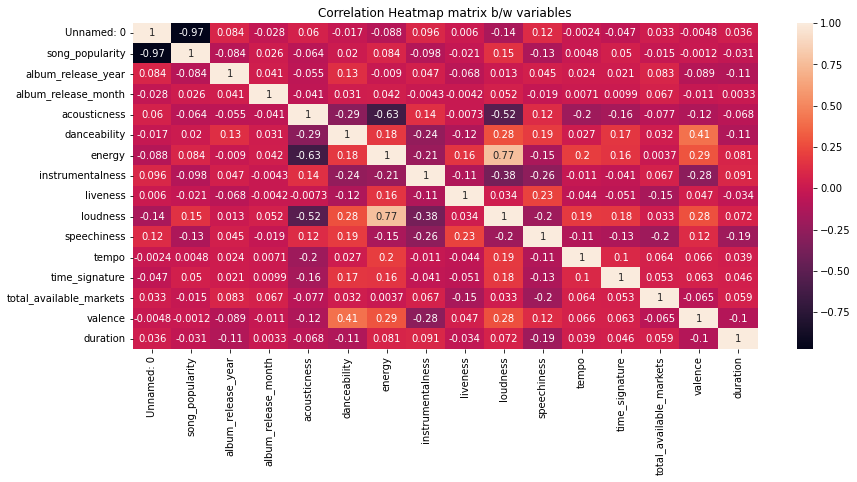

In [ ]:
#to get correlation heatmap b/w variable
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True)
heatmap.set_title("Correlation Heatmap matrix b/w variables")


In [ ]:
#conclusion from heatmap:
#1.loudness and energy ,valence and danceability are positively correlated 
#2.acousticness is negatively correlated with energy and loudness
#3.moderate correlation b/w valence and danceability,energy and loudness.

In [ ]:
#sampling the datatset
sample_df=df.sample(int(0.004*len(df)))
print(len(sample_df))

1682


[Text(0.5, 1.0, 'Loudness v/s energy')]

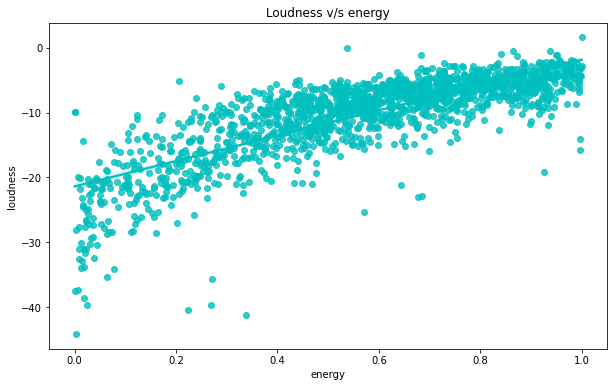

In [ ]:
#regression plot
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y="loudness" ,x="energy",color='c').set(title="Loudness v/s energy")

[Text(0.5, 1.0, 'song_popularity v/s acousticness')]

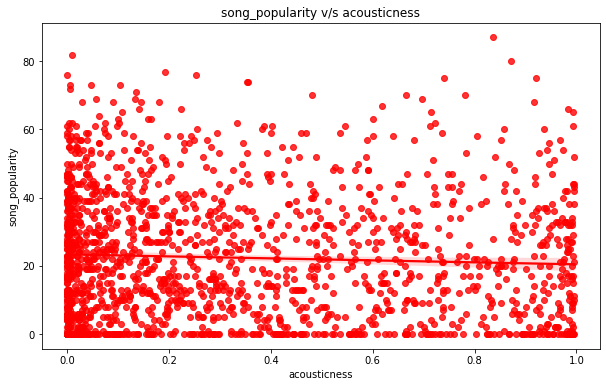

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y="song_popularity" ,x="acousticness",color='r').set(title="song_popularity v/s acousticness")

In [ ]:
#conclusion from regression plot
#1.loudness an denergy are highly correlated ,but there can be some outliers
#2.song popularity and acousticness are negartivly correlated

In [ ]:
#detecting outliers 

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0                 221128.50000
song_popularity                29.00000
album_release_year              5.00000
album_release_month             7.00000
acousticness                    0.54020
danceability                    0.22800
energy                          0.37000
instrumentalness                0.16300
key                             6.00000
liveness                        0.17020
loudness                        6.34700
mode                            1.00000
song_explicit                   0.00000
speechiness                     0.18980
tempo                          43.89125
time_signature                  0.00000
total_available_markets         1.00000
valence                         0.39700
duration                       93.00000
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(119058, 25)

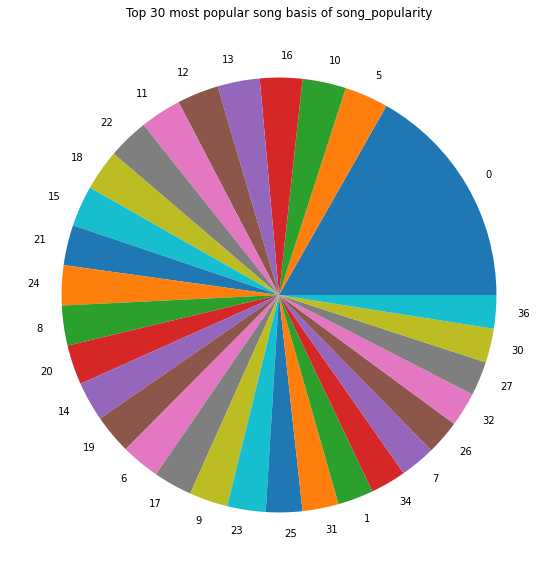

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
df.song_popularity.value_counts()[:30].plot(ax=ax, kind = "pie")
ax.set_ylabel("")
ax.set_title("Top 30 most popular song basis of song_popularity")
plt.show()

In [4]:
px.line(x='album_release_year', y='loudness', data_frame=df, title="Danceability over the course of the Year")

NameError: ignored

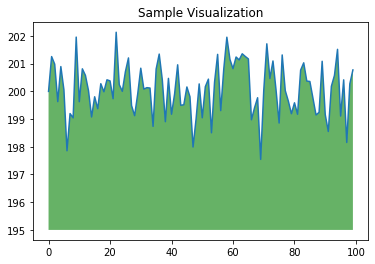

In [5]:
ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()
